## GOAL: To create a model whether a customer will churn or not

##  Step1:Imports and read in the data

In [1]:
#CELLS TO START THE PROJECT!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #Ignore warings
warnings.filterwarnings("ignore")
#importing necessary libraries

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step2 : Data Check


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Step3: EDA

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# The above result indicates that there are no null values.

## Visualizing and plotting data for analysis 


### Class labels(Yes/No)


<Axes: xlabel='Churn', ylabel='count'>

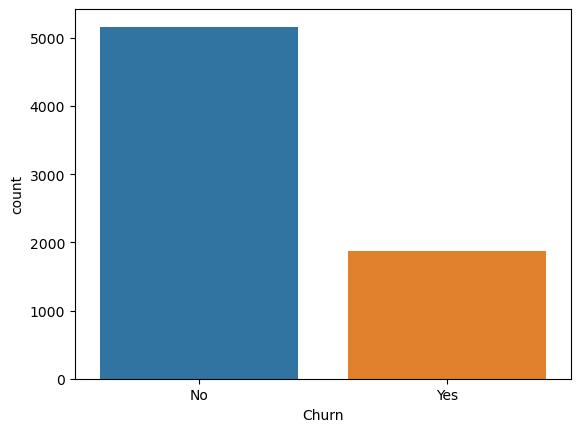

In [8]:
sns.countplot(data=df,x='Churn')

In [9]:
##The above chart indicates it is an imbalanced data.


### Distribution of Total charges between churn categories

<Axes: xlabel='Churn', ylabel='TotalCharges'>

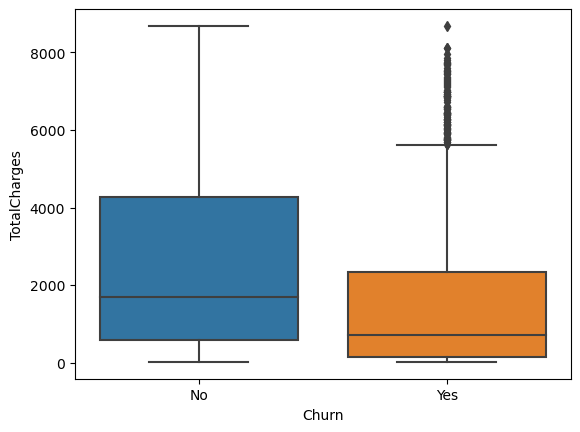

In [10]:

sns.boxplot(data=df,x='Churn',y='TotalCharges')

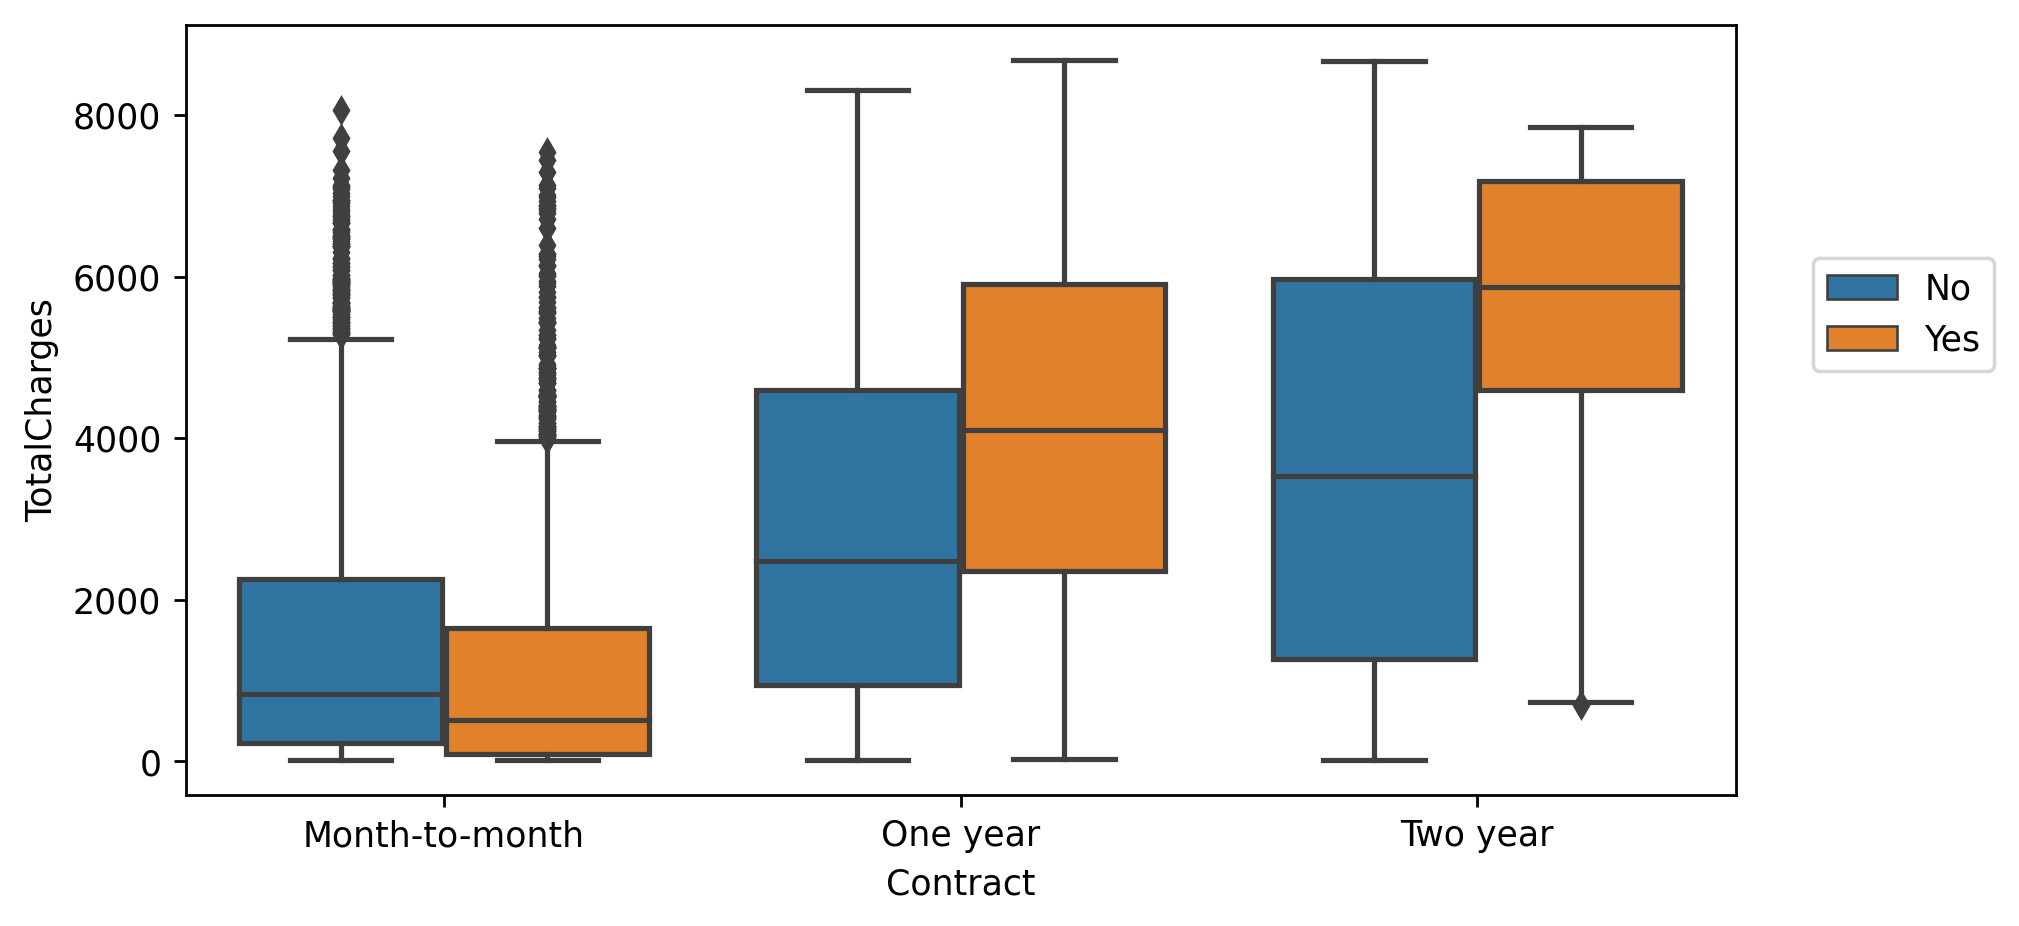

In [11]:
plt.figure(figsize=(8,4),dpi=250)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.05,0.55))

In [12]:
##The above plot shows the box plot tells us that the churn rate might be higher with customers whose total charges are higher at both one year contracts,
#as lots of them seem to pay over charges.

#### Correlation of the dependent variable(class variable) with the independent variables(Features)

In [13]:
df.columns 
##available columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
##Here we need to convert the categorical features into dummy variables inorder to calculate the correlation

In [15]:
corr_df= pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [16]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]
##Getting the correlation values of churn_yes with all the columns excluding with itself and churn_no

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

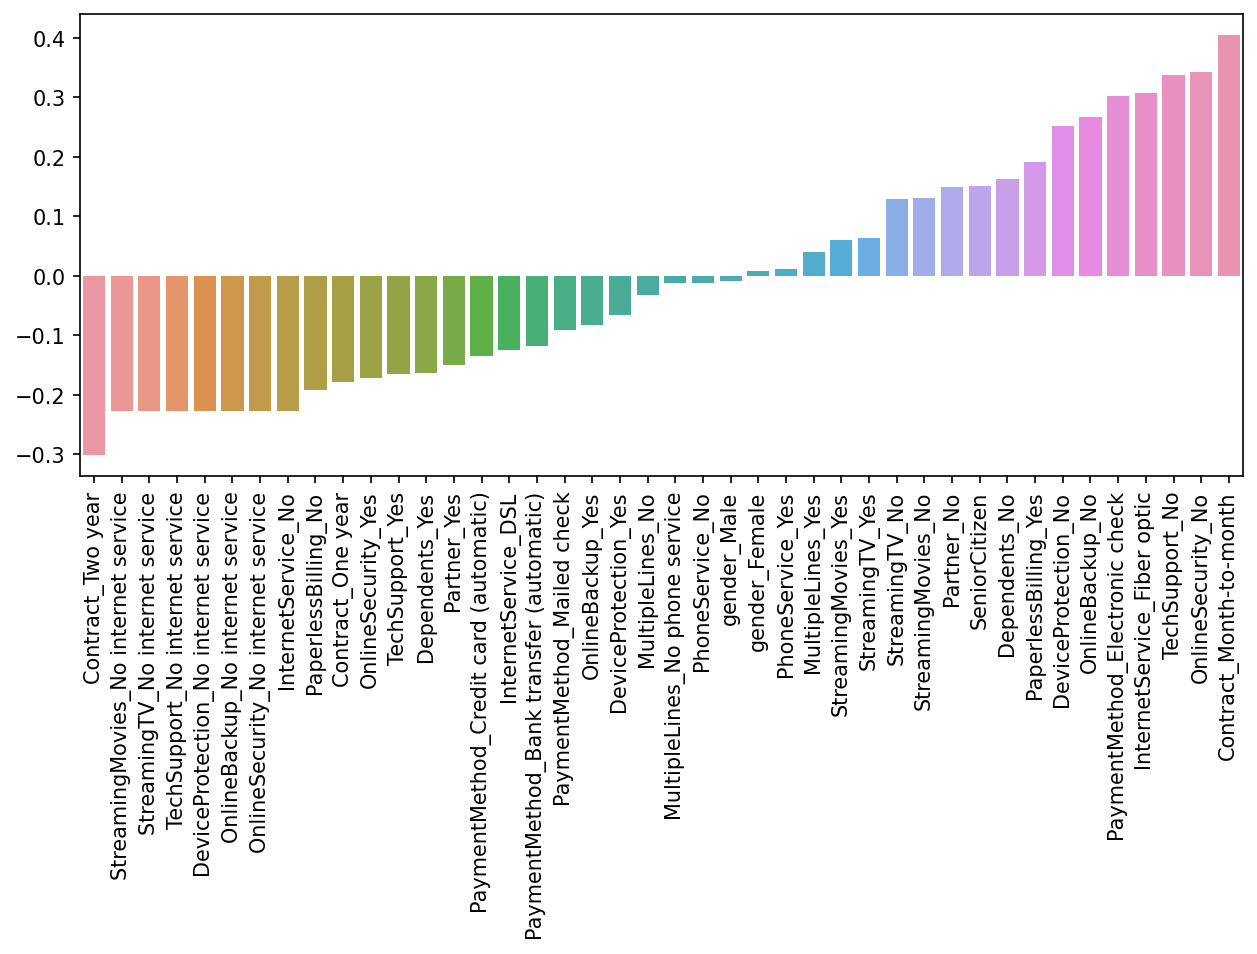

In [17]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.xticks(rotation=90);

## Step 4 : Churn Analysis

In [18]:
## Let's check the types of contracts available

In [19]:
print(df['Contract'].nunique())
print(df['Contract'].unique())

3
['Month-to-month' 'One year' 'Two year']


In [20]:
##Let us check the tenure period of the customers ie, the number of months a customer was or has been a customer.

<Axes: xlabel='tenure', ylabel='Count'>

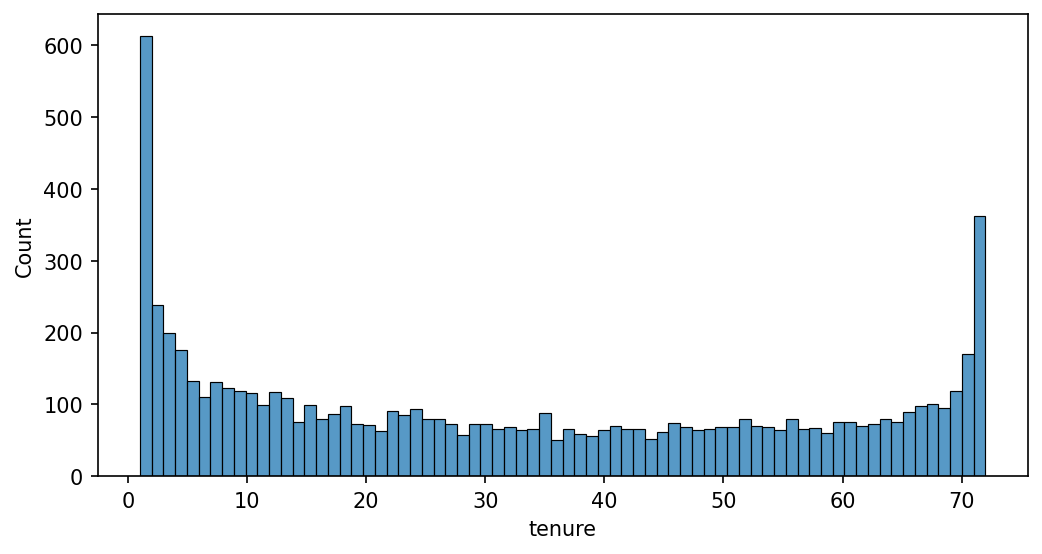

In [21]:
plt.figure(figsize=(8,4),dpi=150)
sns.histplot(data=df,x='tenure',bins=72)

<Figure size 1620x540 with 0 Axes>

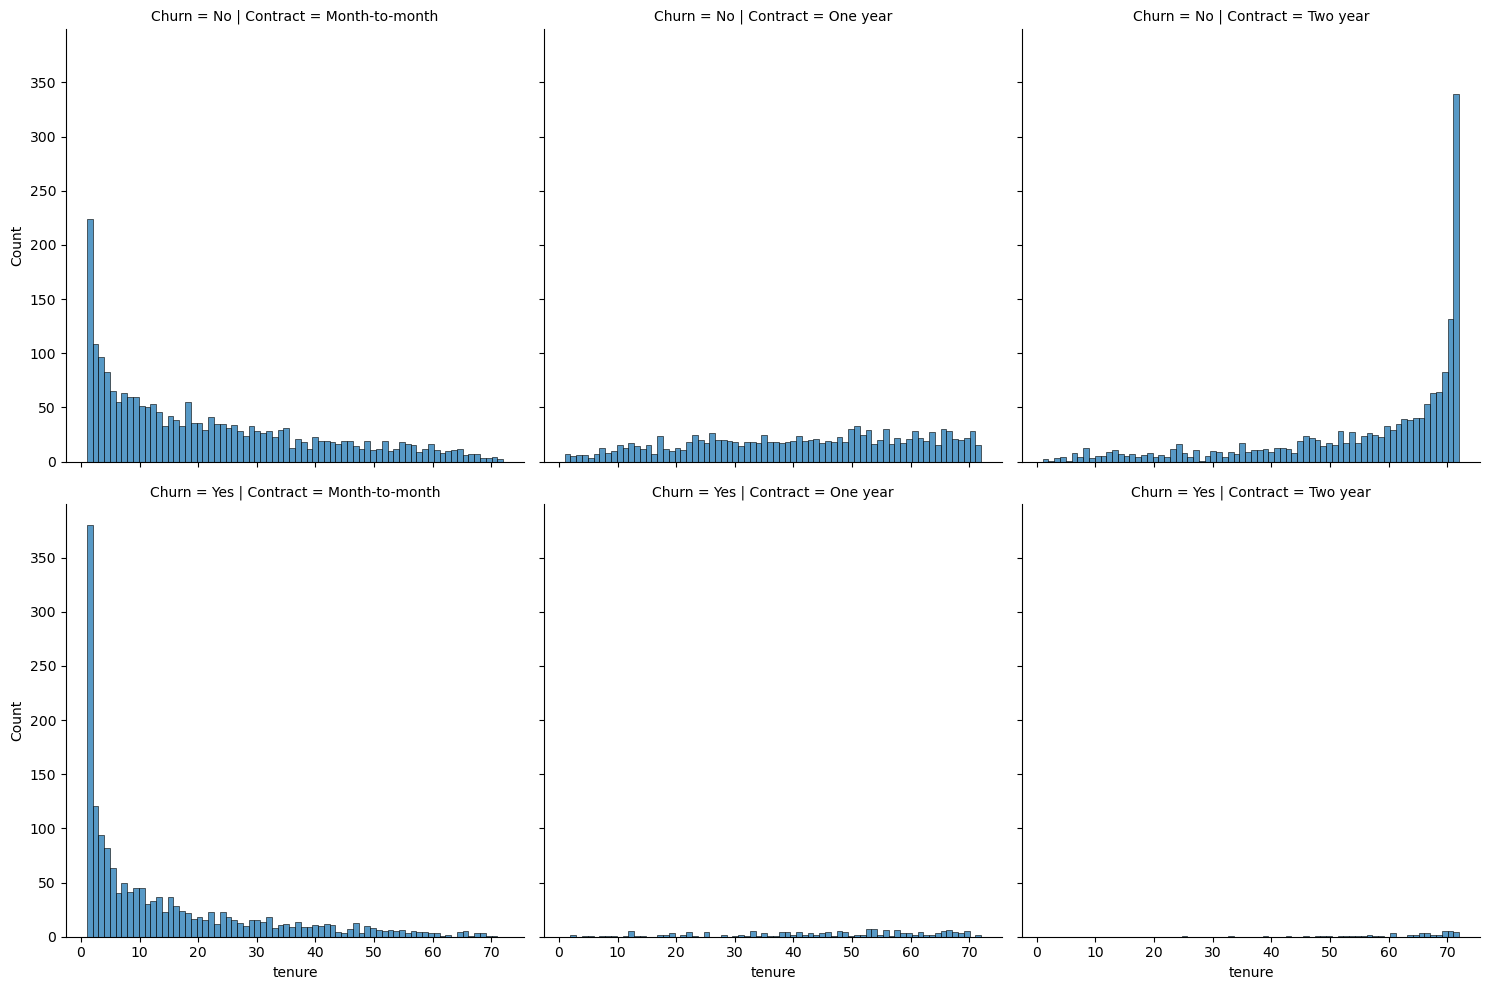

In [22]:
plt.figure(figsize=(9,3),dpi=180)
sns.displot(data=df,x='tenure',bins=72,col='Contract',row='Churn')

In [23]:
## The above dist plot shows the churn rate is higher in  month-month contracted customers than that of one and two year contracted customers and in the month-month contracted customers the churn rate is much higher with customers whose tenure is very less(customers who are new)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

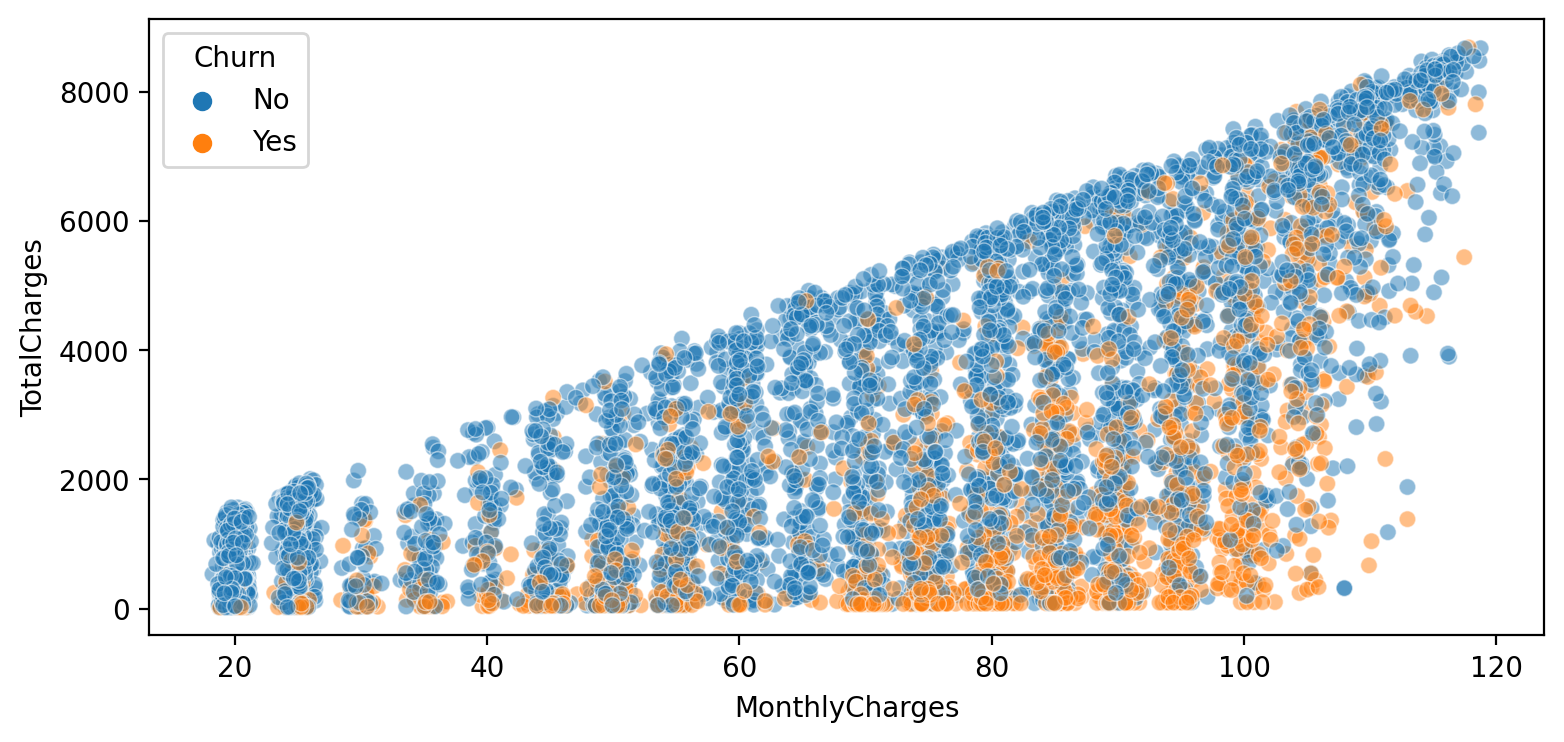

In [24]:
plt.figure(figsize=(9,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',linewidth=0.5,alpha=0.5)

In [25]:
## The above plot indicates the churn rate is mostly  higher in customers who are paying high monthly charges and based on previous displot it is even higher in month-month contracted customers(higher monthly charges)

### Creating Cohorts based on tenure

In [26]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [27]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [28]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

In [29]:
###Plot showing churn-rate per months of tenure

<Axes: xlabel='tenure'>

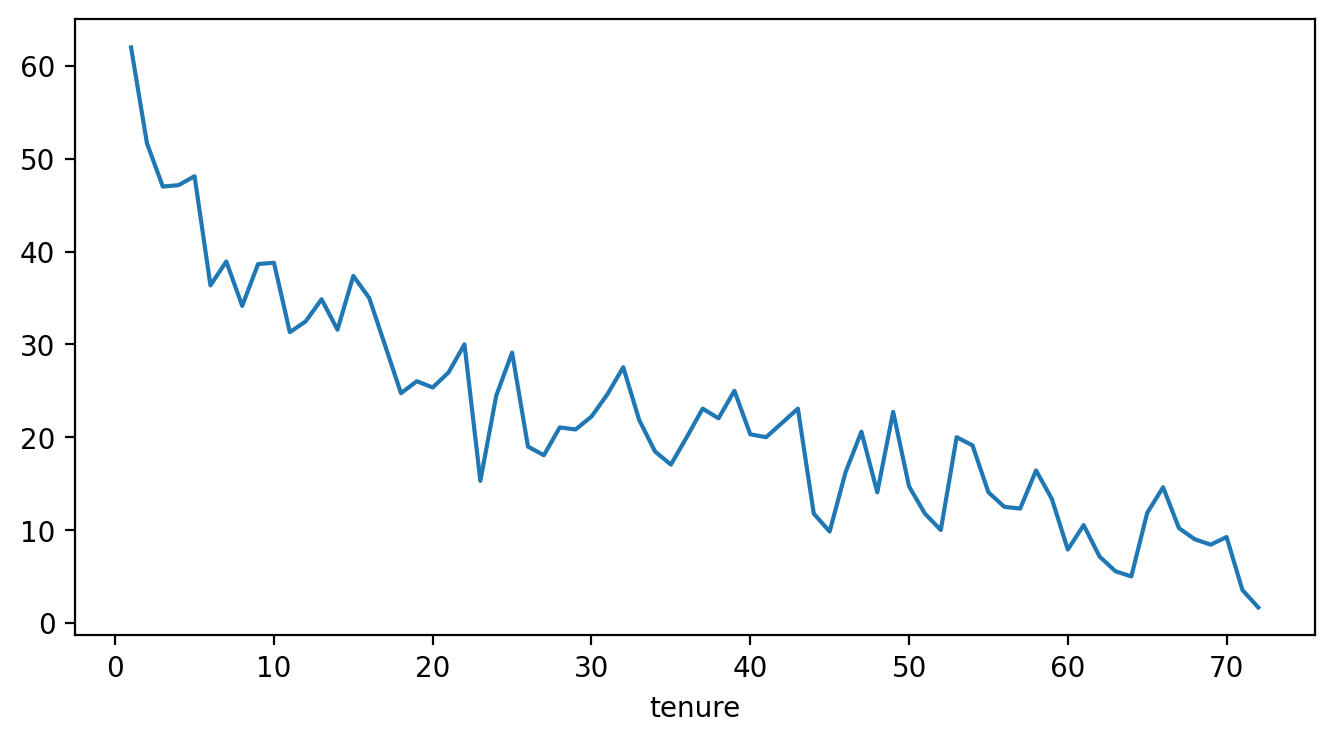

In [30]:
plt.figure(figsize=(8,4),dpi=200)
churn_rate.transpose()['customerID'].plot()

### Creating broader cohort groups

In [31]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '13-24 Months'
    elif tenure<49:
        return '25-48 Months'
    else:
        return 'Over 48 Months'
    
    

In [32]:
df['Tenure Cohort']=df['tenure'].apply(cohort)

In [33]:
df.head()[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,25-48 Months
2,2,0-12 Months
3,45,25-48 Months
4,2,0-12 Months


#### Scatter plot of Total Charges versus Monthly Charges with Tenure Cohort as the hue

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

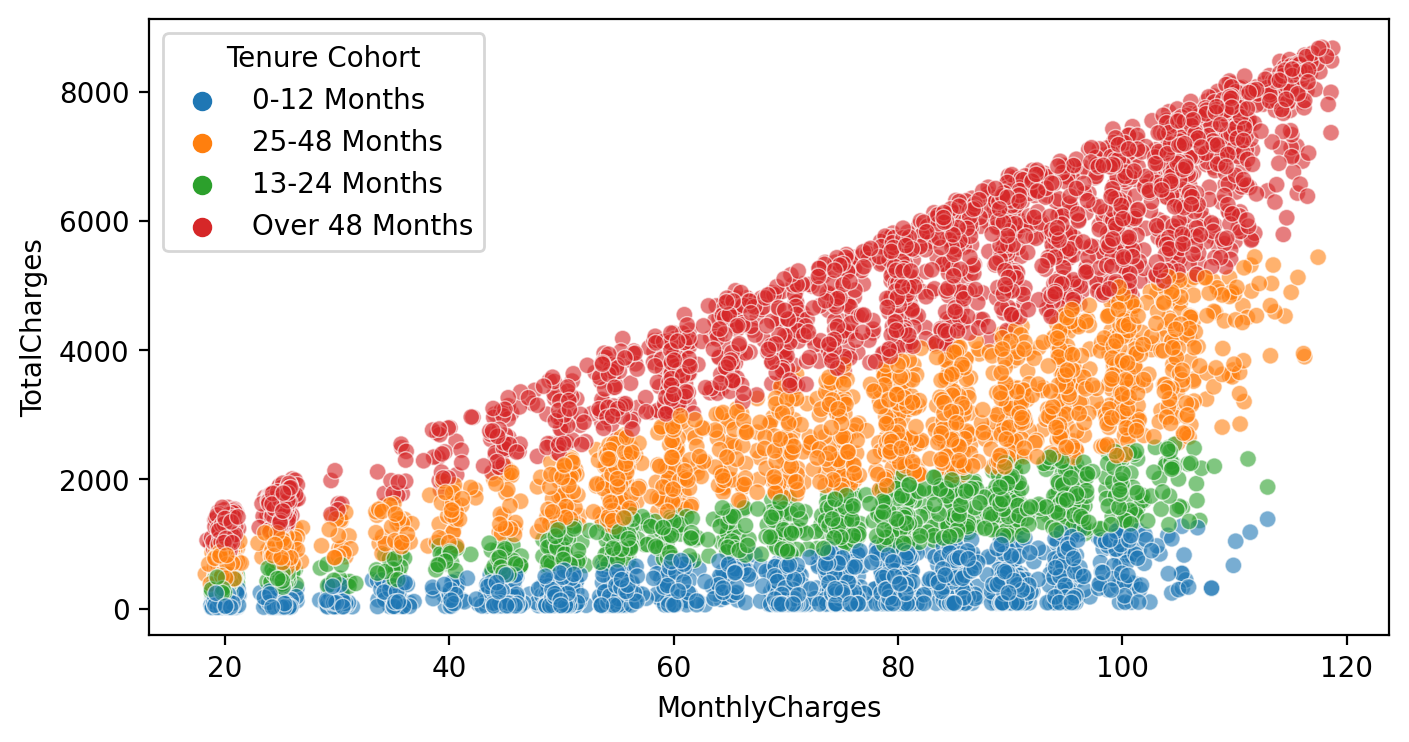

In [34]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',linewidth=0.5,alpha=0.6)

#### Count plot showing Churn count per cohort

<Axes: xlabel='Tenure Cohort', ylabel='count'>

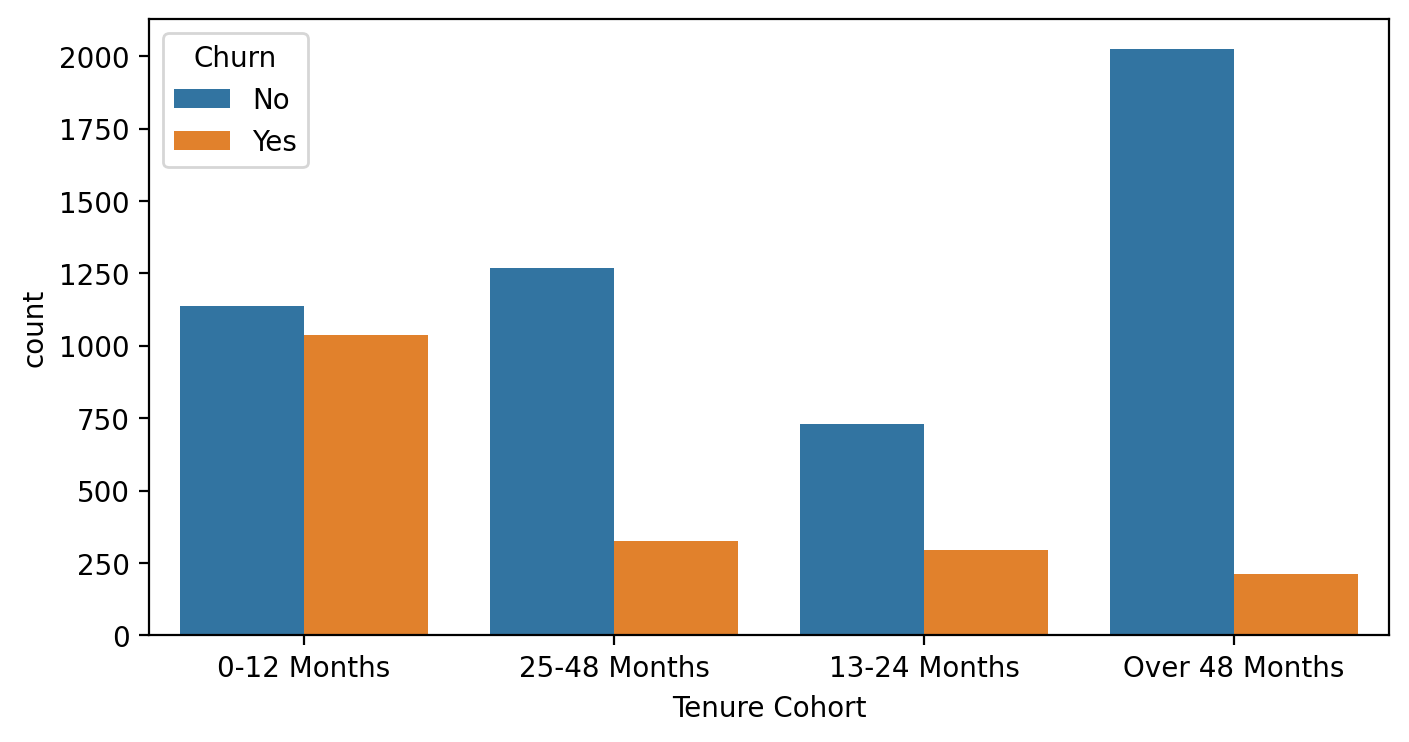

In [35]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

In [36]:
###The above count plot indicates the highest percentage of churn rate is in 0-12months cohort

#### Grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and  Churn hue.

<Figure size 2000x800 with 0 Axes>

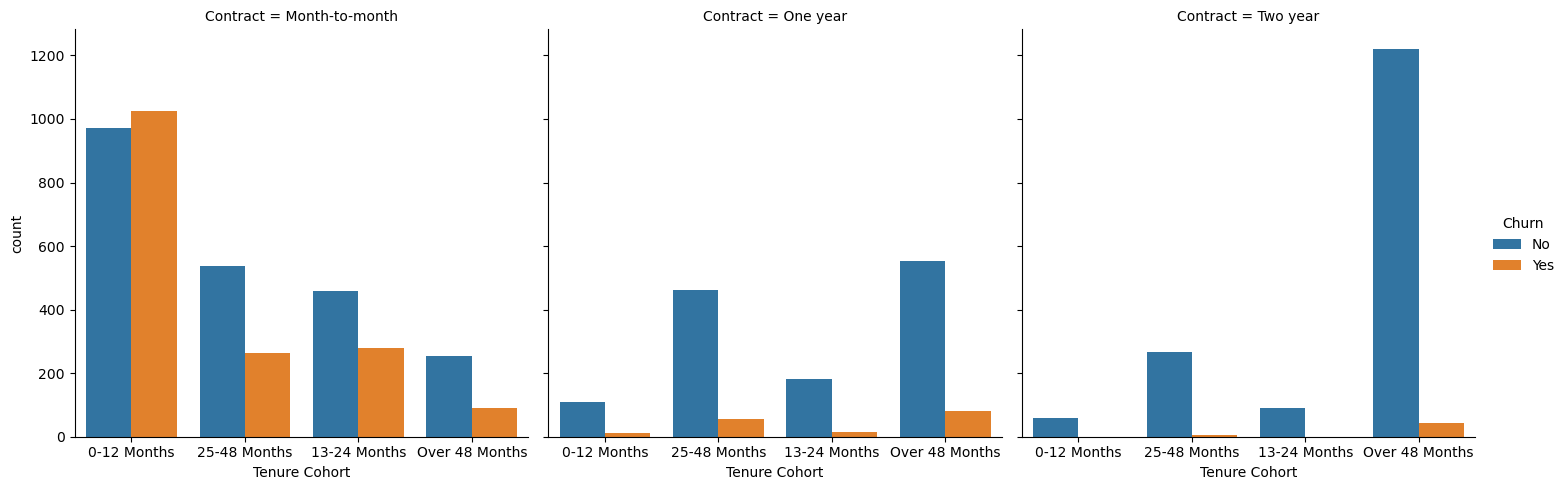

In [37]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

In [38]:
###The above plot indicates the churn rate is higher in 0-12 months Tenure Cohort with Month-to-Month Contract Customers

## Step5 : Predective Modeling

#### Seperating X features and y label.Creating dummy variables and dropping features which are not useful 

In [39]:
X=df.drop(['customerID','Churn'],axis=1)
X=pd.get_dummies(X,drop_first=True)

In [40]:
y=df['Churn']

In [41]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_13-24 Months,Tenure Cohort_25-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


### Perform a train test split, holding out 10% of the data for testing

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [44]:
from sklearn.tree import DecisionTreeClassifier

### Single Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt=DecisionTreeClassifier( max_depth=6)

In [47]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [48]:
preds=dt.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay


In [50]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



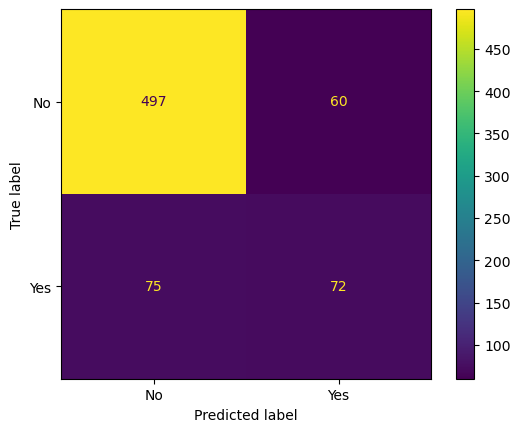

In [51]:
#plot_confusion_matrix(dt,X_test,y_test)
ConfusionMatrixDisplay.from_predictions(y_test,preds)

In [52]:
imp_feats=pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values('Feature Importance')


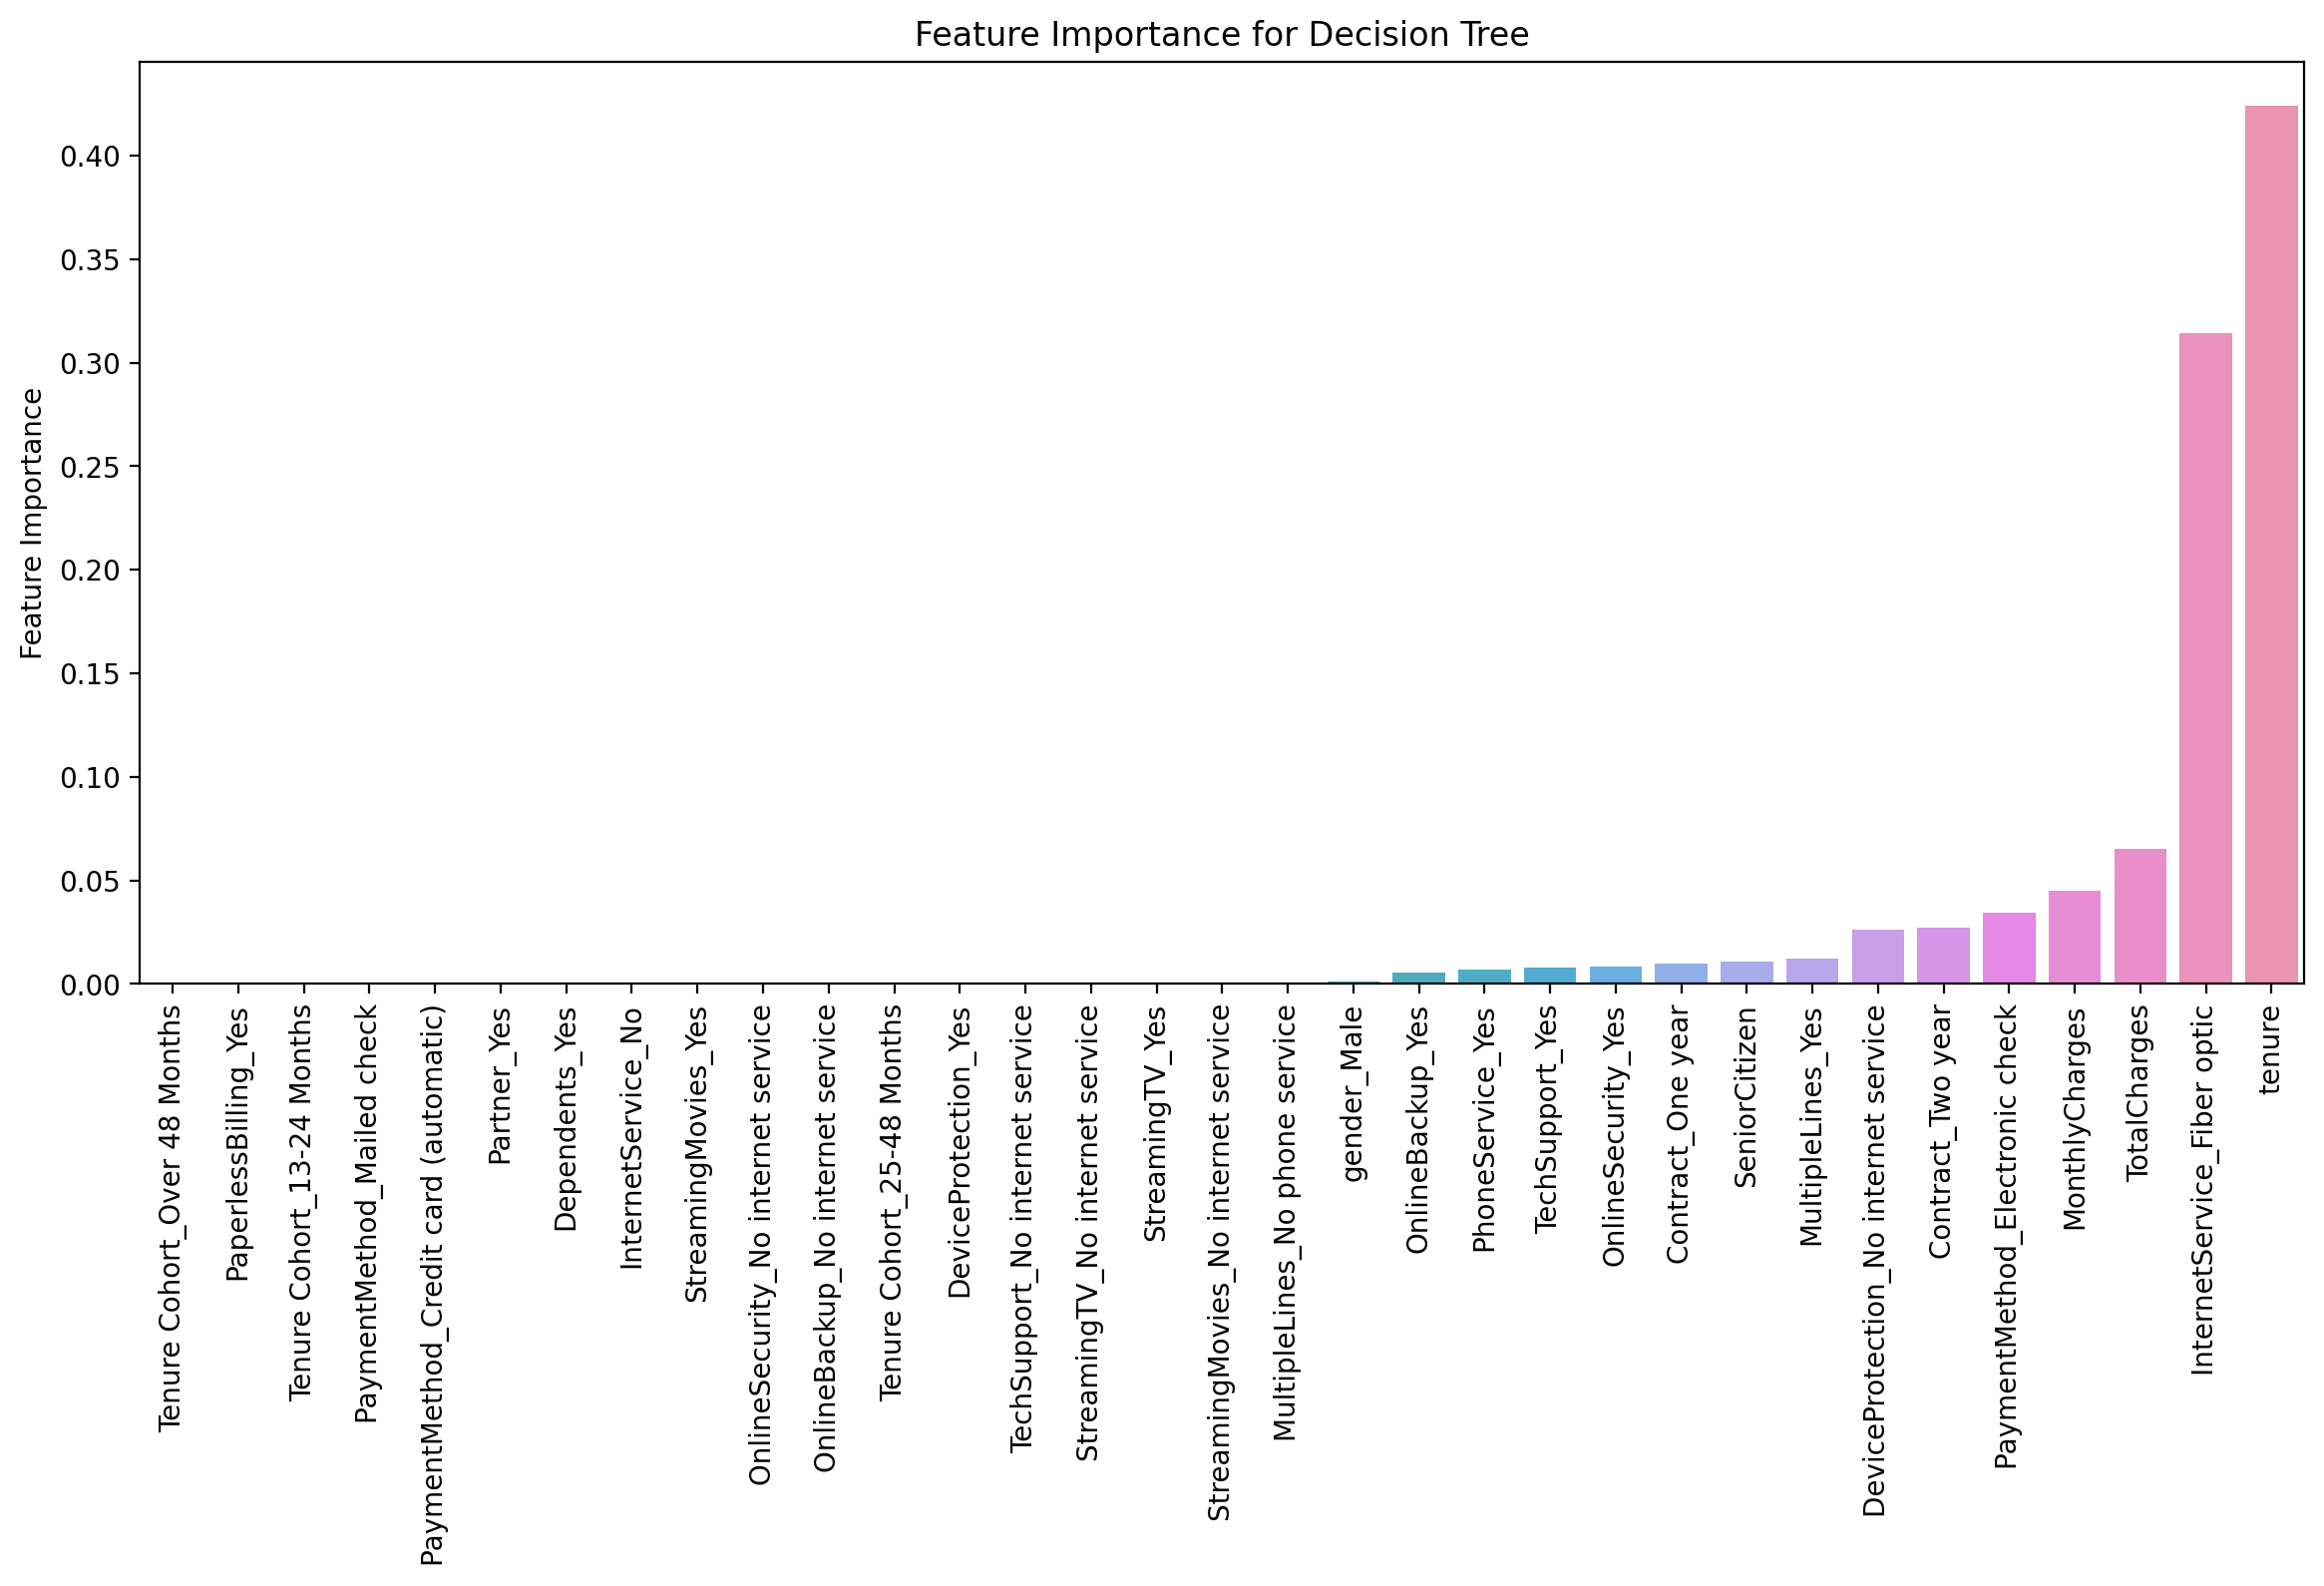

In [53]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [54]:
from sklearn.tree import plot_tree

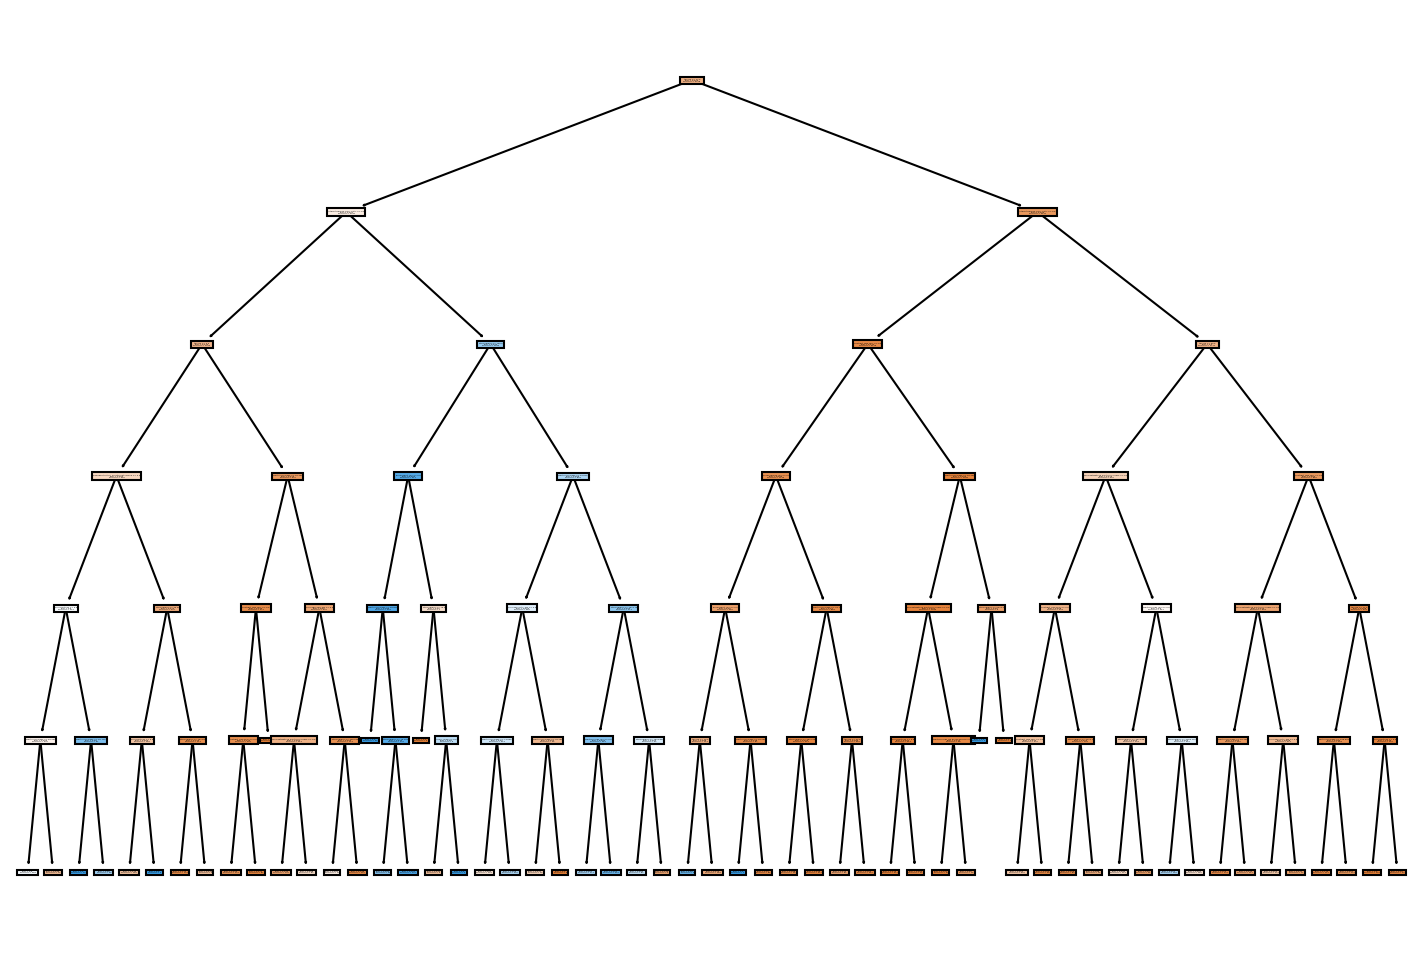

In [55]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf=RandomForestClassifier(n_estimators=100)

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
preds=rf.predict(X_test)

In [60]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88       557
         Yes       0.54      0.46      0.50       147

    accuracy                           0.81       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.80      0.81      0.80       704



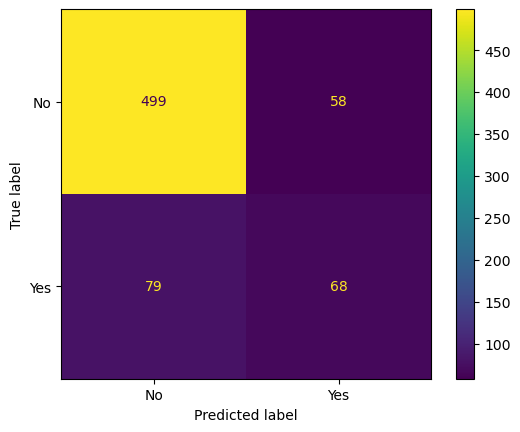

In [61]:

ConfusionMatrixDisplay.from_predictions(y_test,preds)

### Boosted Trees

In [62]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [63]:
ada_model = AdaBoostClassifier()

In [64]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [65]:
preds = ada_model.predict(X_test)

In [66]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



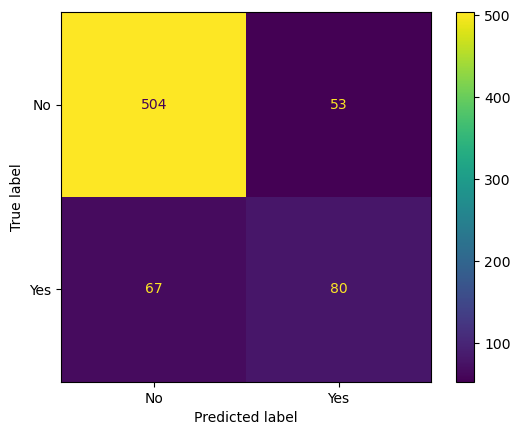

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test,preds)

In [68]:
grad_model= GradientBoostingClassifier()

In [69]:
grad_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [70]:
preds = grad_model.predict(X_test)

In [71]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



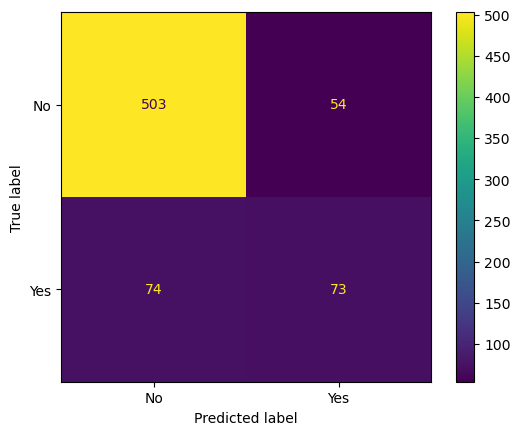

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test,preds)

In [73]:
########overall Adaboost is performing better of all the algorithms